In [1]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight



In [2]:
# Step 1: Load the dataset
data = pd.read_csv(r"D:\New folder\Dataset .csv")
df = pd.DataFrame(data)

# Display the raw dataset
print("Raw Dataset:")
print(df)

Raw Dataset:
      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

              

In [3]:

# Cell 5: Encode categorical variables (cuisine type)
label_encoder = LabelEncoder()
data['cuisine_encoded'] = label_encoder.fit_transform(data['Cuisines'])

First few rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas,

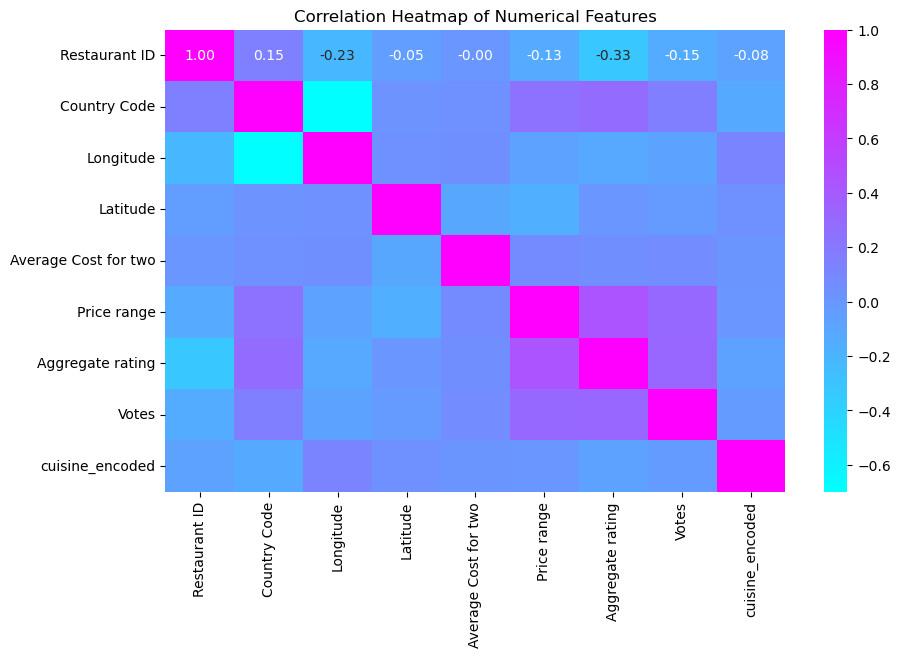

In [4]:
# Cell 3: Display the first few rows of the dataset and visualize correlations
print("First few rows of the dataset:")
print(data.head())

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Create a heatmap of correlations between numerical features with a different colormap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='cool', fmt=".2f")  # Changing the colormap to 'cool'
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


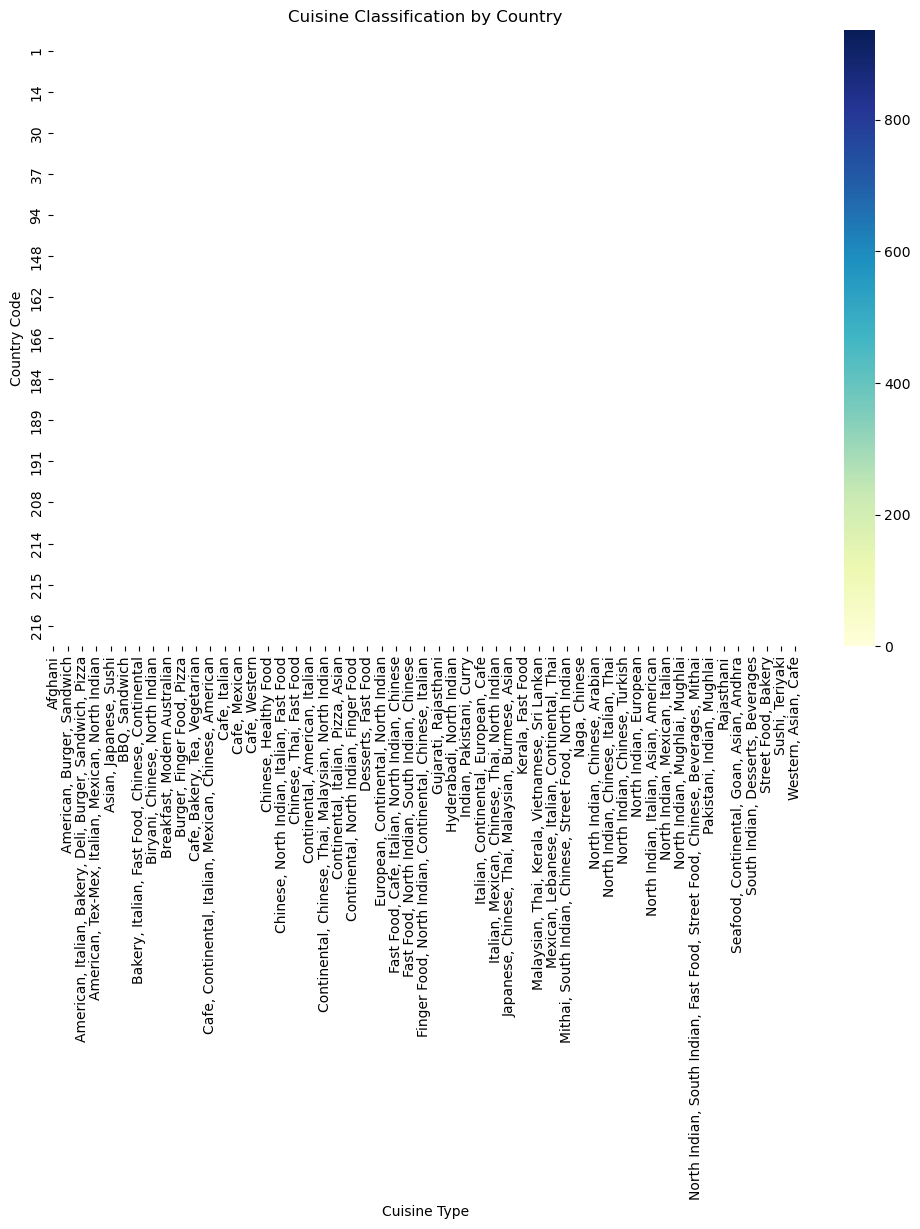

In [5]:
# Cell 6: Visualize cuisine classification with a heatmap
plt.figure(figsize=(12, 8))

# Pivot the data to create a matrix where rows represent countries/cities and columns represent cuisine types
cuisine_pivot = data.pivot_table(index='Country Code', columns='Cuisines', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(cuisine_pivot, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.title('Cuisine Classification by Country')
plt.xlabel('Cuisine Type')
plt.ylabel('Country Code')
plt.show()


In [6]:

# Split the data into training and testing sets
X = data.drop(['Cuisines', 'cuisine_encoded'], axis=1)
y = data['cuisine_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of selected features
selected_features = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
 

In [7]:


# Instantiate the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train[selected_features], y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test[selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print("Precision:", precision)

# Calculate recall

recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred), zero_division=1)
print("Recall:", recall)



Accuracy: 0.09785452642595499
Precision: 0.11352138367766404
Recall: 0.13328581610833928
